# Fake Job Postings Data Wrangling

## By: Andrew Grefer, Rebbeca Jorgensen, Jonathan Murphy, and Will Storment

First, we importedthe proper packages in order to begin our datawrangling efforts.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

Next, we created a pandas dataframe out of our data and looked at the first 15 rows to see if the data loaded correctly and to get a better understading of our data. Also, we took a look at the number of columns and rows in the dataframe, the types of data in the columns, how much of the data was null, and different statistical descriptions on columns that had numbers in them.

In [7]:
df_fake = pd.read_csv('fake_job_postings.csv')

In [8]:
df_fake.head(15)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [9]:
df_fake.shape

(17880, 18)

In [10]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [11]:
df_fake.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


After that examination of the data, it was clear we had a lot to do in order to make this data uselful before we begin our data modeling. To do this we created a new data frame that we can edit as to not mess up the original dataframe and save the original as a reference. Also, we saved the 'fraudulent' column for future predicting/modeling and dropped columns that will have little to no use for creating our model.

In [12]:
fraudulent_col = df_fake.fraudulent
fake_model = df_fake.drop(labels = ['job_id', 'department', 'function', 'fraudulent'], axis = 1)

fake_model.head(20)

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry
0,Marketing Intern,"US, NY, New York",NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN
1,Customer Service - Cloud Video Production,"NZ, , Auckland",NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care
5,Accounting Clerk,"US, MD,",NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
6,Head of Content (m/f),"DE, BE, Berlin",20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN
8,HP BSM SME,"US, FL, Pensacola",NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services


Next, we replaced the NaNs in our data to at least have some place holders, and since most of our data is text, we simply changed the NaNs to something along the lines as 'not stated'.

In [13]:
fake_model["title"].replace(np.nan, 'No title stated', inplace = True)
fake_model["location"].replace(np.nan, 'No location stated', inplace = True)
fake_model["company_profile"].replace(np.nan, 'No profile', inplace = True)
fake_model["description"].replace(np.nan, 'No description', inplace = True)
fake_model["requirements"].replace(np.nan, 'No requirements stated', inplace = True)
fake_model["employment_type"].replace(np.nan, 'Not stated', inplace = True)
fake_model["required_experience"].replace(np.nan, 'Not stated', inplace = True)
fake_model["required_education"].replace(np.nan, 'Not stated', inplace = True)
fake_model["industry"].replace(np.nan, 'No industry stated', inplace = True)

Then, we changed the salary range and benefits columns since they both have little value as they are with little data. However, we believe knowing whether a job posting includes the salaray and/or benefits will help our model be more accurate in finding the fake job postings ,so we changed them to binary to show whether the postings state the salary/benefits or not. Also we renamed the columns accoridingly to match these changes.

In [14]:
fake_model['salary_range'].loc[~fake_model['salary_range'].isnull()] = 1
fake_model['salary_range'].loc[fake_model['salary_range'].isnull()] = 0 
fake_model['benefits'].loc[~fake_model['benefits'].isnull()] = 1
fake_model['benefits'].loc[fake_model['benefits'].isnull()] = 0 
fake_model.rename(columns={'salary_range': 'salary_stated', 'benefits' : 'benefits_stated'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
fake_model.head(15)

,title,location,salary_stated,company_profile,description,requirements,benefits_stated,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry
0,Marketing Intern,"US, NY, New York",0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,Not stated,No industry stated
1,Customer Service - Cloud Video Production,"NZ, , Auckland",0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,0,1,0,Full-time,Not Applicable,Not stated,Marketing and Advertising
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,Not stated,Not stated,Not stated,No industry stated
3,Account Executive - Washington DC,"US, DC, Washington",0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software
4,Bill Review Manager,"US, FL, Fort Worth",0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care
5,Accounting Clerk,"US, MD,",0,No profile,Job OverviewApex is an environmental consultin...,No requirements stated,0,0,0,0,Not stated,Not stated,Not stated,No industry stated
6,Head of Content (m/f),"DE, BE, Berlin",1,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,1,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media
7,Lead Guest Service Specialist,"US, CA, San Francisco",0,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",1,0,1,1,Not stated,Not stated,Not stated,No industry stated
8,HP BSM SME,"US, FL, Pensacola",0,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,0,0,1,1,Full-time,Associate,Not stated,Information Technology and Services
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services


Below are just some simple visualizations of some of the data we have that we can catagorize so we can explore the data more. After looking at these picture, we are ready to start creating a model now that the data is wrangled and we have a complete understanding of it.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Full-time'),
  Text(2, 0, 'Not stated'),
  Text(3, 0, 'Part-time'),
  Text(4, 0, 'Contract'),
  Text(5, 0, 'Temporary')])

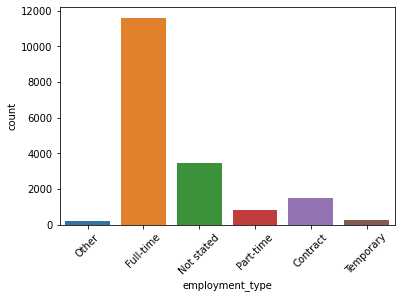

In [16]:
sns.countplot(x='employment_type', data=fake_model)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Internship'),
  Text(1, 0, 'Not Applicable'),
  Text(2, 0, 'Not stated'),
  Text(3, 0, 'Mid-Senior level'),
  Text(4, 0, 'Associate'),
  Text(5, 0, 'Entry level'),
  Text(6, 0, 'Executive'),
  Text(7, 0, 'Director')])

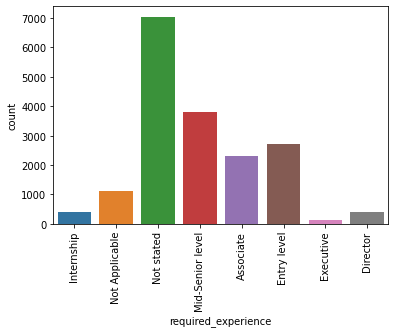

In [17]:
sns.countplot(x='required_experience', data=fake_model)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Not stated'),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, "Master's Degree"),
  Text(3, 0, 'High School or equivalent'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'Some College Coursework Completed'),
  Text(6, 0, 'Vocational'),
  Text(7, 0, 'Certification'),
  Text(8, 0, 'Associate Degree'),
  Text(9, 0, 'Professional'),
  Text(10, 0, 'Doctorate'),
  Text(11, 0, 'Some High School Coursework'),
  Text(12, 0, 'Vocational - Degree'),
  Text(13, 0, 'Vocational - HS Diploma')])

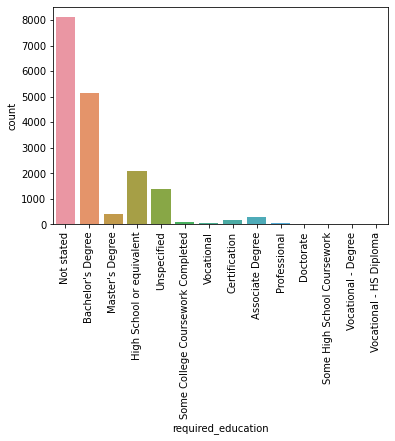

In [18]:
sns.countplot(x='required_education', data=fake_model)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

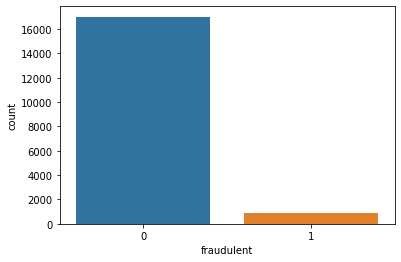

In [19]:
sns.countplot(x='fraudulent', data=df_fake)

<AxesSubplot:xlabel='salary_stated', ylabel='count'>

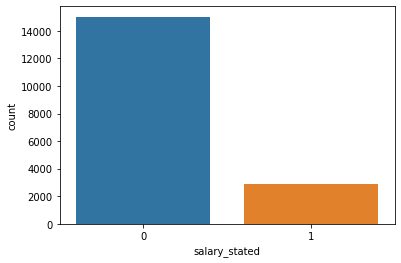

In [20]:
sns.countplot(x='salary_stated', data=fake_model)

<AxesSubplot:xlabel='benefits_stated', ylabel='count'>

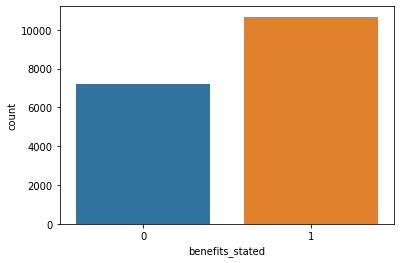

In [21]:
sns.countplot(x='benefits_stated', data=fake_model)